 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [726]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [727]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [728]:
# Count nulls
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [729]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [730]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [731]:
# Count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [732]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [733]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df.sort_index(ascending = True, inplace = True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',', '')
sp_tsx_history_df.head()

/var/folders/0s/3_5ky1wd0553ttqtrr_sqv_c0000gn/T/ipykernel_1537/690802747.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$', '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [734]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [735]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype('float')
sp_tsx_history_df['Close'].dtype

dtype('float64')

In [736]:
# Calculate Daily Returns
sp_tsx_history_df.isnull().sum()
sp_tsx_returns_df = sp_tsx_history_df.pct_change()
sp_tsx_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [737]:
# Drop nulls
sp_tsx_returns_df.pct_change
sp_tsx_returns_df.dropna(inplace=True)
sp_tsx_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [738]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns_df = sp_tsx_returns_df.rename(columns={"Close":"S&P TSX"})
sp_tsx_returns_df.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [739]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_portfolios_df = pd.concat([whale_returns_df,algo_returns_df, sp_tsx_returns_df], axis='columns', join='inner')
combined_portfolios_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

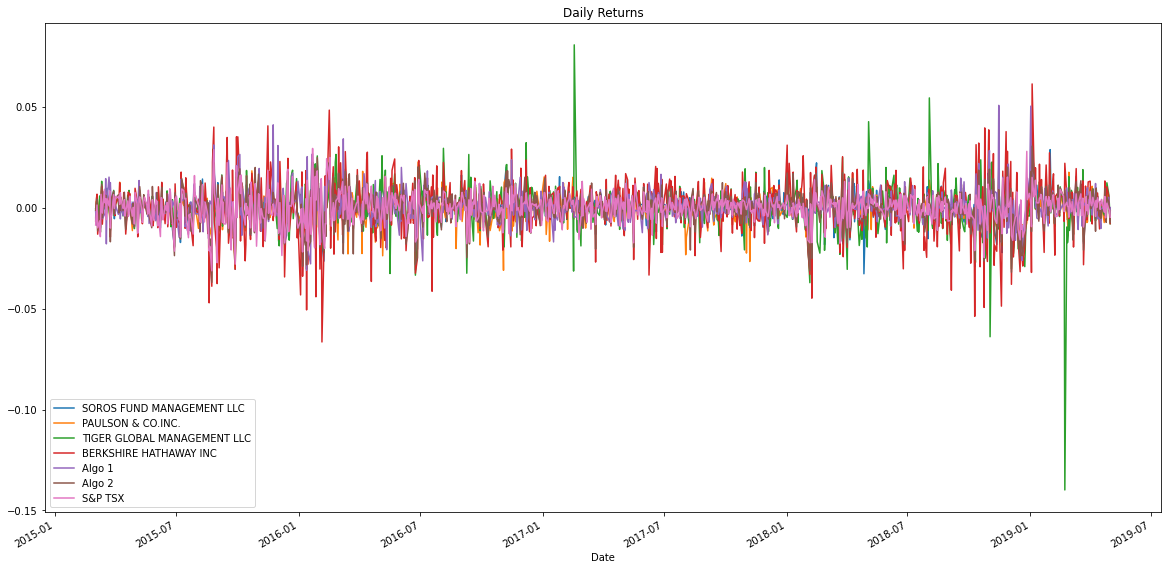

In [740]:
# Plot daily returns of all portfolios
combined_portfolios_df.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

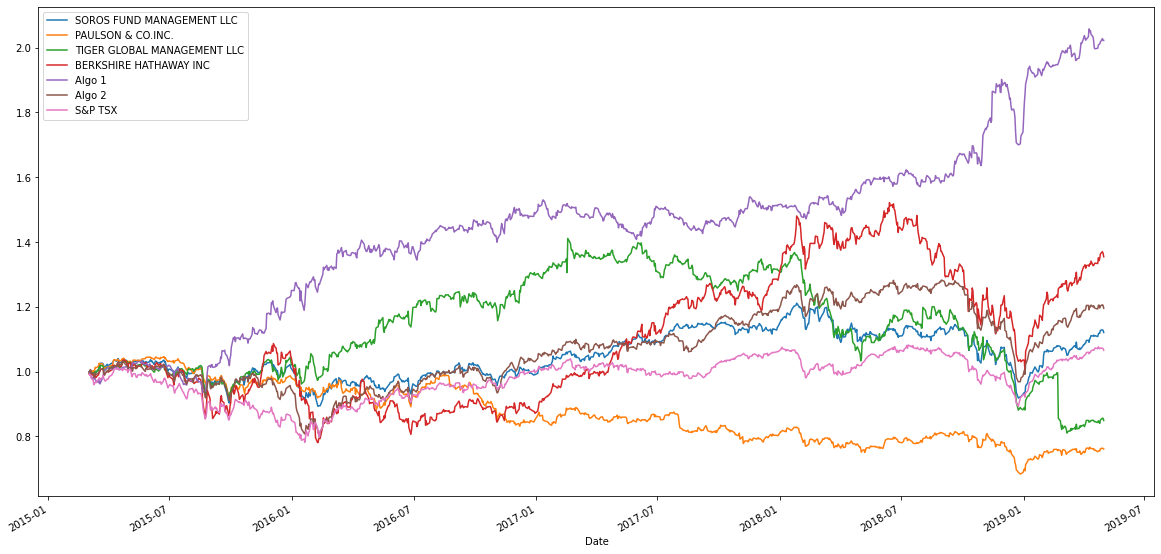

In [741]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combined_portfolios_df).cumprod()
combined_portfolios_df_cumulative_returns.head()
# Plot cumulative returns
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

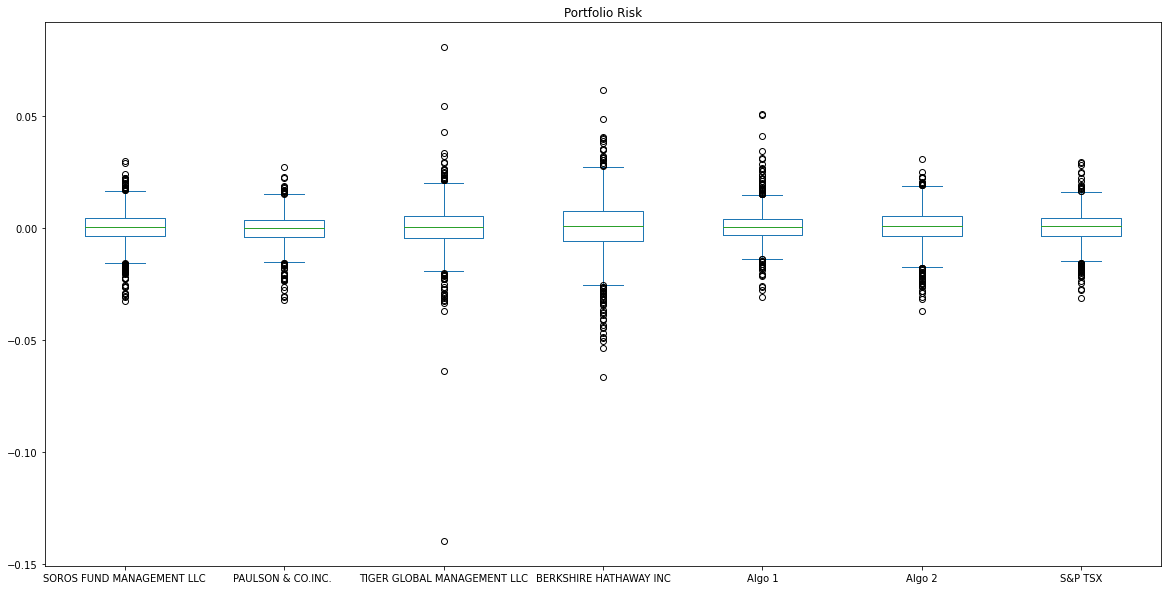

In [742]:
# Box plot to visually show risk
combined_portfolios_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [743]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_portfolios_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [744]:
# Calculate  the daily standard deviation of S&P TSX 60
portfolios_riskier_than_SPTSX =[daily_std > daily_std['S&P TSX']]
# Determine which portfolios are riskier than the S&P TSX 60
portfolios_riskier_than_SPTSX

[BERKSHIRE HATHAWAY INC          True
 TIGER GLOBAL MANAGEMENT LLC     True
 Algo 2                          True
 SOROS FUND MANAGEMENT LLC       True
 Algo 1                          True
 S&P TSX                        False
 PAULSON & CO.INC.              False
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [745]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

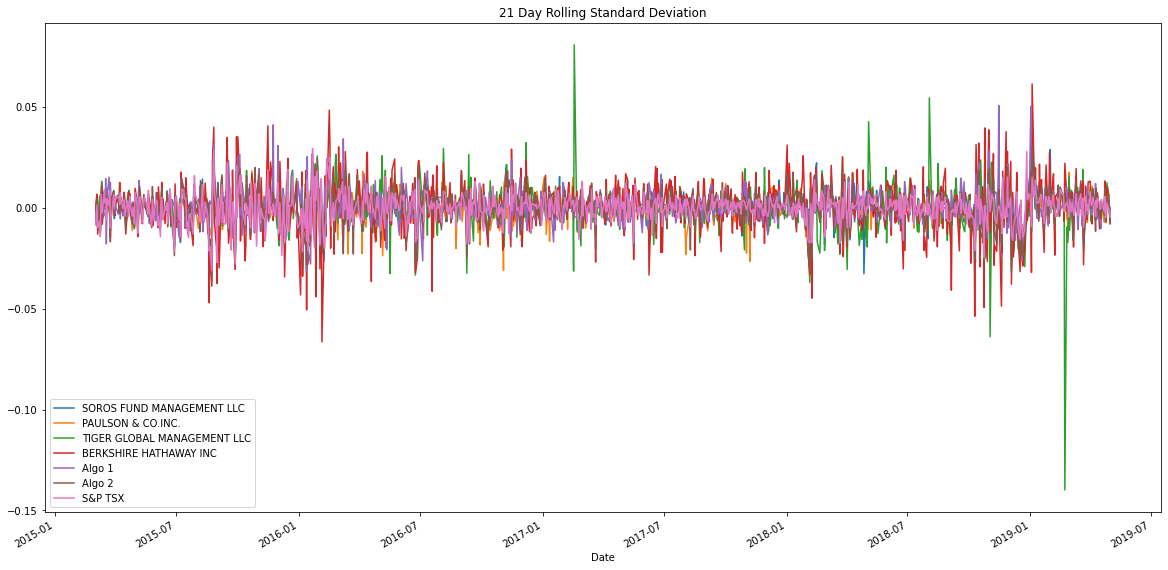

In [746]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_portfolios_df.plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

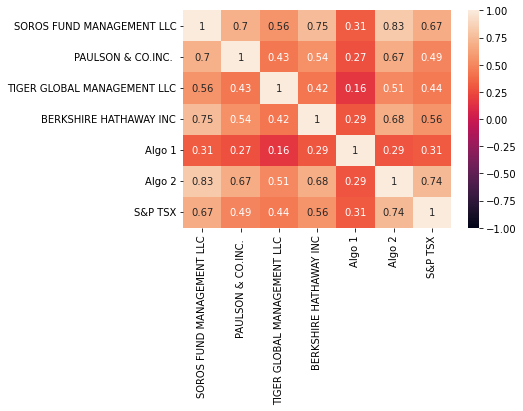

In [747]:
# Calculate the correlation
correlation = combined_portfolios_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

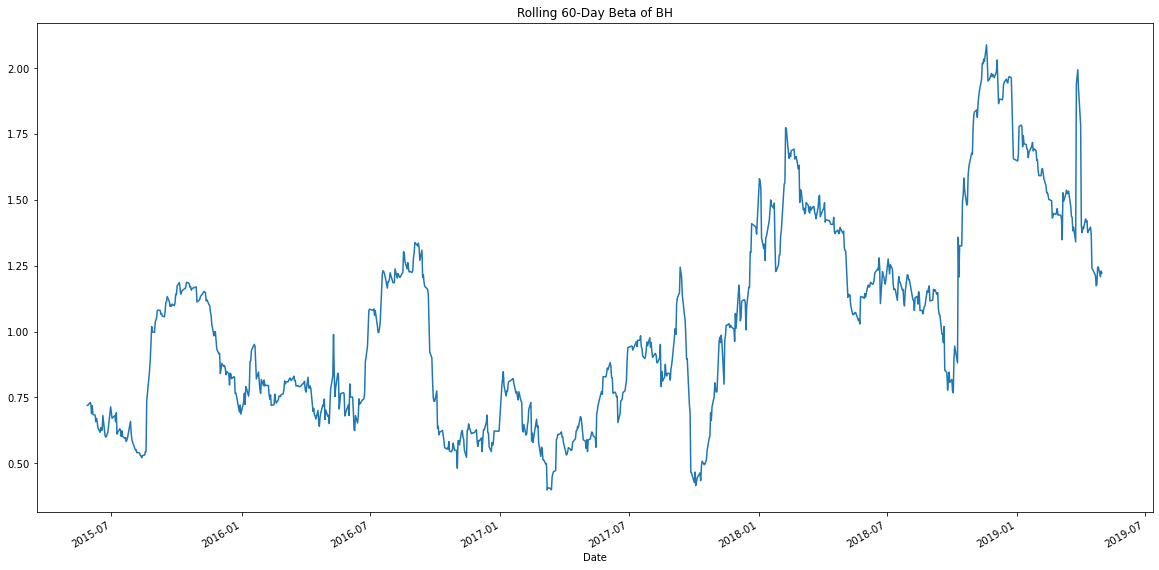

In [748]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_portfolios_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_portfolios_df['S&P TSX'])
# Calculate variance of S&P TSX 60
rolling_variance = combined_portfolios_df['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}, xlabel='Date'>

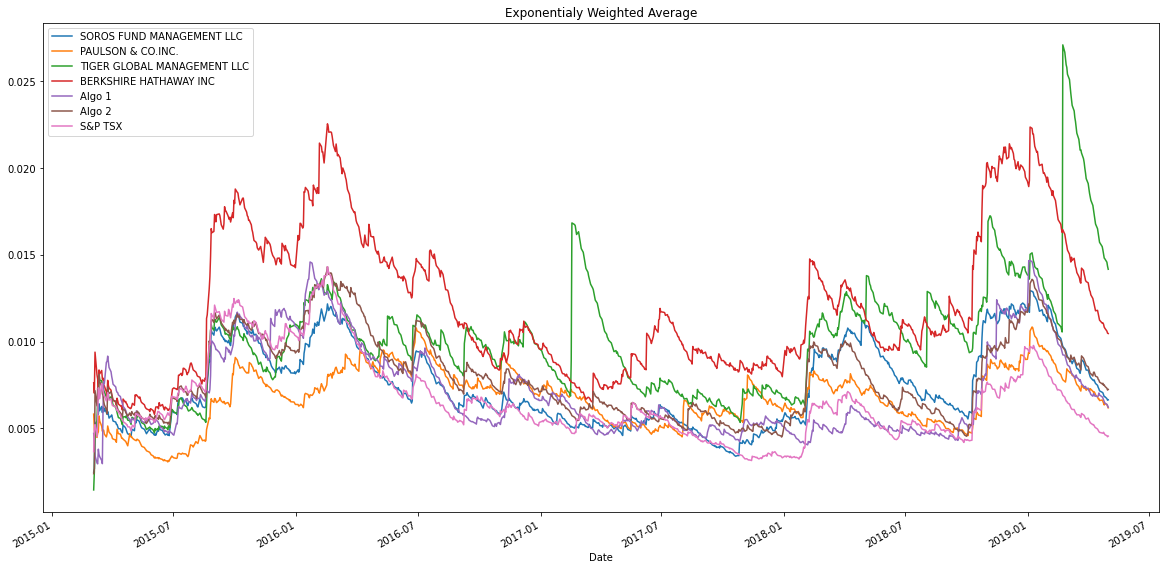

In [749]:
# Use `ewm` to calculate the rolling window
# rolling_window_ewma = combined_portfolios_df.rolling(window=100).mean().plot(figsize=(20, 10))
rolling_window_ewma = combined_portfolios_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [750]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_portfolios_df.mean() * 252) / (combined_portfolios_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

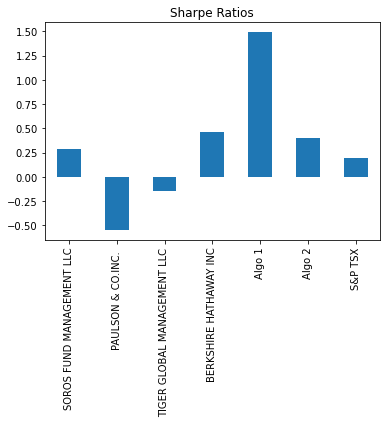

In [751]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [752]:
# Reading data from 1st stock
CBA_history_csv = Path("Resources/CBA.AX.csv")
CBA_history_df = pd.read_csv(CBA_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
CBA_history_df = CBA_history_df.drop(columns= "Open")
CBA_history_df = CBA_history_df.drop(columns= "Low")
CBA_history_df = CBA_history_df.drop(columns= "Adj Close")
CBA_history_df = CBA_history_df.drop(columns= "Volume")
CBA_history_df = CBA_history_df.drop(columns= "High")
CBA_history_df.rename(columns = {"Close":"CBA"}, inplace = True)
CBA_history_df.head()

,CBA
Date,
2018-12-31,72.389999
2019-01-02,70.970001
2019-01-03,71.839996
2019-01-04,71.889999
2019-01-07,72.570000


In [753]:
# Reading data from 2nd stock
DXS_history_csv = Path("Resources/DXS.AX.csv")
DXS_history_df = pd.read_csv(DXS_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
DXS_history_df = DXS_history_df.drop(columns= "Open")
DXS_history_df = DXS_history_df.drop(columns= "Low")
DXS_history_df = DXS_history_df.drop(columns= "Adj Close")
DXS_history_df = DXS_history_df.drop(columns= "Volume")
DXS_history_df = DXS_history_df.drop(columns= "High")
DXS_history_df.rename(columns = {"Close":"DXS"}, inplace = True)
DXS_history_df.head()

,DXS
Date,
2018-12-31,10.62
2019-01-02,10.52
2019-01-03,10.57
2019-01-04,10.58
2019-01-07,10.59


In [754]:
# Reading data from 3rd stock
QAN_history_csv = Path("Resources/QAN.AX.csv")
QAN_history_df = pd.read_csv(QAN_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
QAN_history_df = QAN_history_df.drop(columns= "Open")
QAN_history_df = QAN_history_df.drop(columns= "Low")
QAN_history_df = QAN_history_df.drop(columns= "Adj Close")
QAN_history_df = QAN_history_df.drop(columns= "Volume")
QAN_history_df = QAN_history_df.drop(columns= "High")
QAN_history_df.rename(columns = {"Close":"QAN"}, inplace = True)
QAN_history_df.head()

,QAN
Date,
2018-12-31,5.79
2019-01-02,5.76
2019-01-03,5.74
2019-01-04,5.69
2019-01-07,5.79


In [755]:
# Combine all stocks in a single DataFrame
my_portfolio_combined_df = pd.concat([CBA_history_df, DXS_history_df, QAN_history_df], axis="columns", join="inner")
my_portfolio_combined_df.sort_index(ascending = True, inplace = True)
my_portfolio_combined_df

,CBA,DXS,QAN
Date,,,
2018-12-31,72.389999,10.62,5.79
2019-01-02,70.970001,10.52,5.76
2019-01-03,71.839996,10.57,5.74
2019-01-04,71.889999,10.58,5.69
2019-01-07,72.570000,10.59,5.79
...,...,...,...
2019-12-23,80.839996,11.81,7.39
2019-12-24,80.709999,11.92,7.33
2019-12-27,81.070000,12.00,7.34


In [756]:
# Reset Date index
my_portfolio_combined_df.index =  my_portfolio_combined_df.index.normalize()

# Reorganize portfolio data by having a column per symbol


In [757]:
# Calculate daily returns
my_portfolio_combined_df = my_portfolio_combined_df.pct_change()
# Drop NAs
my_portfolio_combined_df.dropna()
my_portfolio_combined_df
my_portfolio_combined_returns = my_portfolio_combined_df.pct_change()
my_portfolio_combined_returns.dropna(inplace=True)
# Display sample data
my_portfolio_combined_returns.head()

,CBA,DXS,QAN
Date,,,
2019-01-03,-1.624932,-1.504753,-0.329861
2019-01-04,-0.943221,-0.800946,1.508711
2019-01-07,12.589745,-0.000945,-3.017575
2019-01-08,-1.145679,-3.997167,0.081002
2019-01-09,0.401936,-1.000000,0.873498


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [758]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted_returns = my_portfolio_combined_returns.dot(weights)
# Display sample data
my_portfolio_weighted_returns.head()

Date
2019-01-03   -1.153182
2019-01-04   -0.078485
2019-01-07    3.190408
2019-01-08   -1.687282
2019-01-09    0.091811
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [759]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios_2_df = pd.concat([whale_returns_df,algo_returns_df, sp_tsx_returns_df, my_portfolio_weighted_returns], axis='columns', join='inner')
combined_portfolios_2_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368,-1.153182
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048,-0.078485
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373,3.190408
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,-1.687282
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665,0.091811


In [760]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios_2_df.dropna(inplace=True)
combined_portfolios_2_df.rename(columns = {0:"My_Portfolio"}, inplace = True)
combined_portfolios_2_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My_Portfolio
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.009368,-1.153182
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.015048,-0.078485
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.005373,3.190408
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.006965,-1.687282
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.013665,0.091811
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.571889
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.681563
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,-1.768819


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [761]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(combined_portfolios_2_df.std()).rename(columns = {0:"std"})
ann_portfolio_std = portfolio_std *np.sqrt(252)
ann_portfolio_std

,std
SOROS FUND MANAGEMENT LLC,0.118005
PAULSON & CO.INC.,0.108285
TIGER GLOBAL MANAGEMENT LLC,0.287528
BERKSHIRE HATHAWAY INC,0.202787
Algo 1,0.088160
Algo 2,0.120690
S&P TSX,0.073288
My_Portfolio,NaN


### Calculate and plot rolling `std` with 21-day window

In [762]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

### Calculate and plot the correlation

In [763]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [764]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [765]:
# Calculate Annualized Sharpe Ratios


In [766]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!